# HW 6: Neural Network

In this guided tutorial, we will start with neural network. We will learn how to build and a train a neural network using Python library Keras.

If you need an introduction to CNNs, you can read this: https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

## Part 0: Classify hand-written digits

We will take a look at a first concrete example of a neural network using Keras library: https://keras.io/. First, you have to install Keras library. Here is the instructions: https://keras.io/about. As you saw in documentation you have first to install TensorFlow, Theano, or CNTK and then Keras library. We recommend the TensorFlow backend. (For most of you: just use commands 'pip install tensorflow' followed by 'pip install keras') <br>
We will learn how to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you get deep in machine learning field, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

Let us first import keras:

In [1]:
import keras
keras.__version__

'2.10.0'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.<br>
Let's have a look at the training data:

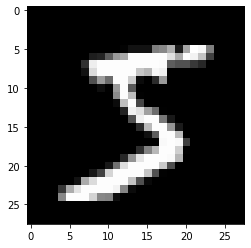

This is a handwritten number  5
Shape of input matrix:  (60000, 28, 28)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

image_nr = 0
plt.imshow(train_images[image_nr], cmap='gray', vmin=0, vmax=255)
plt.show()
print('This is a handwritten number ', train_labels[image_nr])

print('Shape of input matrix: ', train_images.shape)

#### Question 1.1 (5 points): The 'shape' of the matrix is (60000, 28, 28). What do each of these numbers mean?

In order for our neural network to work, we have to flatten our image into pixels. We do so by defining pixels 1:28 in the first row and continue onto 29. Eventually we will get get a total of 28x28 input values and we can consider this to be a very long vector. Each dimension is 28x28 and we have 60,000 total pictures of the hand writing to work with.


Our workflow will be as follows: first we will present our neural network with the training data, train_images, and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels. Let's build our network:

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the "layer", a data-processing module which you can conceive as "transforming" your data. Some  data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully  representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple (or sometimes more complex) layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a  succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

#### Question 1.2 (5 points): Search internet and keras help to understand what "softmax" is doing. Can you explain why it is a popular choice for mutlti-class classification problems?

'softmax' is a kind of generalization of the sigmoid function. Essentially, softmax will assign decimal probabilities to each class in our multi-class problem. Softmax is implemented in a neural network just before the output layer. The decimal values all add up to 1 and has the same number of nodes as the ouput layer. Whichever class receives the highest probability. It is important to note that softmax assumes that each example can only be a member of exactly one class, not multiple.

Softmax works to rescale our ten outputs such that they rescale to 1 and because they sum up to one, we can treat our outputs as probability. 

#### Question 1.3 (5 points): Could you explain why we use 'relu' in first layer and 'softmax' in the second layer? A friend tells you that 'tanh' can be a good activation function. To try it out, would you replace 'relu', 'softmax' or both? Justify your answer.


ReLUs have a notable tendency to be better for neural networks that have a degree of dichotomy. This is a perfect example for us because there is a clear division between what might constitute one group and what constitutes another group: different numbers. SoftMax is great for our inferential capacity. This is good for when our network has to make a decision on a gradient of probability instead of a clearcut binary decision. In this case, our computer might think that a 7 is actually a 1 and in this case it might be good to have a gradient to better discern which number it actually is. 

TanH function is a nonlinear function which looks like a negative hyperbola. It makes the model easier to generalize or to adapt with a variety of data and to differentiate the output. I would replace the softmax function with the tanh function. Both functions are sigmoidal in nature and the tanh function can be used to for classification between classes. The advantage of the tanh function is that negative inputs will be mapped as strongly negative and the zero inputs will be mapped near the value of zero in the tanh graph.



To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function. 'rmsprop' is specific type of the gradient descent algorithm. Keras offers a few versions of the optimizer.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

In [5]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Question 1.4 (5 points): Search internet and keras documentation to understand 'categorical_crossentropy'. Could you explain why we use 'categorical_crossentropy' for loss function in this application?

categorical_crossentropy is a standard for probabilities and is connected with the measure of how likely is something or how much information does something have. The purpose of it is to take our output probabilities and then measure their corresponding distance from the truth values. Categorical cross entropy will make the model's output as close to the possible to the truth values. 

We use categorical cross entropy because we use true labels that are one-hot coded. For our 9 digit classification problem, each number will only have 1 true value. For example, for digit 2, our true value will look like: [0,1,0,0,0,0,0,0,0].

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

As you could see from the result above that labels are digits, ranging from 0 to 9. We will turn each digit into a one-hot vector of length 10.

In [8]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data. We can specify how many epoch of gradient descent are we using (how many passes through the whole data set) and what is the size of mini-batch for a single weight update.

In [9]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2560 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1036 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0494 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9887


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an high accuracy (around 98%) on the training data. Now let's check that our model performs well on the test set too:

In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9798


In [11]:
print('test_acc:', test_acc)

test_acc: 0.9797999858856201


Our test set accuracy will be a bit lower than the training set accuracy. 

#### Question 1.5: What will be an example of overfiting here?

One example of overfitting will occur when we overtrain our model to the point where it is unable to generalize new data. This happens when we train too much on our training data and do not add noise or some other method to decrease our chances of overfitting. 

One example for this in our model would be if someone's handwriting for the number '1' looked incredible similar to the number '7'. In this case, if we overfit our data, our model might only recognize all of the ones as sevens and would lose the ability to discern between the two of them.


#### Question 1.6 (5 points): Try to play with numbers of epochs and batch_size. What is your result compared to what we got?

With epoch 1 and batch size 64, we receive an accurracy of 0.9344. <br> 
With epoch 5 and batch size 128, we receive an accuracy of 0.9979. <br>
With epoch 10 and batch size 128, we receive an accuracy of 0.9971. <br>
With epoch 10 and batch size 256, we receive an accuracy of 0.9963. <br>
With epoch 5 and batch size 256, we receive an an accuracy of 0.9890. <br>
<br>
It seems that our accuracy increases the fastest when increasing the epoch number and increases at a slower rate when increasing the batch size.

This concludes our very first example of neural network. We learn how we could build and a train a neural network to classify handwritten digits.

## Part 1:   Convolutional Neural Network (CNN) 

In this Part, we will learn how to train CNNs. CNNs are a very popular type of a neural network, particularly for data that come in a vector, matrix, or tensor (3 or higher dimensional array) form, such as sequences, images, and videos. The main innovation compared to the feedforward neural network, which relies on dense layers is a new type of a layer, called the convolutional layer. A neuron (called the filter) in CNN is a small vector, matrix (e.g., size 3x3 or 5x5) or a tensor that scans the input vector, matrix, or a tensor and produces a new vector, matrix, or a tensor. You can decide to use many such neurons in each convolutional layer.

In additon to the convolutional layer, CNNs also inroduce 'MaxPooling' layer which scans a block of an input matrix and finds the maximum value within each block. An outcome of this operation is reduction of the matrix size. Finally, CNNs also use the 'Flatten' operation which vectorizes the input matrix (e.g., converts a 10x10 input matrix into a vector of size 100). After the 'Flatten" operation CNNs typically add one or more dense layers.

For more details about CNN, please consult this blog: 
 https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

All the code is provided. The code is allowing you to prepare the data and train a CNN that classifies which digit is written in an image provided at its input. We will show how you can train 4 different CNN, ranging from simple to more complex, and let you observe how it impacts classification accuracy. 

CNN training can take quite a bit of time (particularly if GPU isn't used), so we will create a training data set that uses a subset of available data. In particular, we will define the classification problem as recognizing whether a digit in an image is 7 or not. The following piece of code shows the data preparation steps.

In [12]:
#Import the required libraries
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

The following block selects a subset of images from the MNIST data.

In [13]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
# The subset is composed of all the examples where the digit is 7, and 20,000 examples are not 7.
sevens = np.where(y_train == 7)[0].tolist()
not_sevens = np.where(y_train != 7)[0].tolist()
num_keepers = 10000
not_sevens = np.random.choice(not_sevens, num_keepers, replace=False).tolist()

subset = sevens + not_sevens
np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

#### Question 2.1 (5 points): Write code to check how many 'sevens' and how many 'not_sevens' there are in our training data? What is the accuracy of a classifier that always predicts that the input is not a seven?

In [14]:
#number of sevens is the length of the list of indices where the image is a 7
amount_seven = len(sevens)
print("There are a total of " + str(amount_seven)+ " sevens in our set")

amount_not_seven = len(not_sevens)
print("There are a total of " +str(amount_not_seven)+" not sevens in our set")


There are a total of 6265 sevens in our set
There are a total of 10000 not sevens in our set


Accuracy is defined by the total number of correct predictions divided by our total number of predictions. The accuracy of a classifier that always predicts that the input is not a seven would be the total of not sevens predicted divided by the total predictions (sevens+not sevens). Therefore, our accuracy would hypothetically be 10,000/16,265 or 0.6148 or 61.48%.

The following code creates training and test data. It would be great if you can spend a few minutes trying to understand what is going on.

In [15]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = (y_train == 7).astype(int)
Y_test = (y_test == 7).astype(int)

# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

### Train a simple CNN (CNN, model 1)

The following code will show how you can define CNN, train it, and test its accuracy. 

**Step 0.** The following is a preparation step, specifying the hyperparameters.

In [16]:
# -- Initializing the values for the convolution neural network

nb_epoch = 10  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# SGD
optimizer = Adam(learning_rate=0.0002, amsgrad=True)

**Step 1.** In this step we define architecture of the CNN

Each line "model.add()" adds another layer to the neural network. The type of layer must be specified. 

In [17]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(26, 26)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

We can check the configuration of the above model by call model.summary()

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                      

#### Question 2.2 (5 points): From the above summary, can you explain the architecture of this CNN?

Our neural network has a total of 6 layers. We begin with a 2 dimensional convolution layer that takes 320 parameters with shape (26, 26, 32). The next layer is our activation function that receives an input of shape (26, 26, 32). We then downsample our input along its spatial dimensions. This is why we see our input of (26, 26, 32) change to (1, 1, 32). We then flatten our pooled feature map into a single long continuous linear vector that gives us one vector of shape (none, 32). Our dense layer then classifies the image based on the ouput from the previous layers. Each layer of our neural network has worked to create a weighted average that we then pass through our activation function. Our activation function will allow us to classify our image as some number.

**Step 2.** Here, we define the loss function. You will see that the loss function is not Mean Square Error, but Cross Entropy. Cross Entropy is a very popular choice when training neural networks for classification problems.

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

**Step 3.** This line of code trains CNN. This is going to take about a minute. Observe that we will only have 2 epochs of training, for the sake of time. You will see how the accuracy on training and valiadion data evolves during training.

In [20]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Epoch 1/10
255/255 [==============================] - 2s 7ms/step - loss: 0.6655 - accuracy: 0.6144 - val_loss: 0.5262 - val_accuracy: 0.8972
Epoch 2/10
255/255 [==============================] - 2s 6ms/step - loss: 0.6500 - accuracy: 0.6148 - val_loss: 0.5354 - val_accuracy: 0.8972
Epoch 3/10
255/255 [==============================] - 2s 6ms/step - loss: 0.6375 - accuracy: 0.6148 - val_loss: 0.5134 - val_accuracy: 0.8972
Epoch 4/10
255/255 [==============================] - 2s 6ms/step - loss: 0.6248 - accuracy: 0.6148 - val_loss: 0.5037 - val_accuracy: 0.8972
Epoch 5/10
255/255 [==============================] - 2s 7ms/step - loss: 0.6092 - accuracy: 0.6157 - val_loss: 0.4833 - val_accuracy: 0.8983
Epoch 6/10
255/255 [==============================] - 2s 7ms/step - loss: 0.5914 - accuracy: 0.6326 - val_loss: 0.4726 - val_accuracy: 0.9080
Epoch 7/10
255/255 [==============================] - 2s 7ms/step - loss: 0.5721 - accuracy: 0.6831 - val_loss: 0.4626 - val_accuracy: 0.9244
Epoch 

Let us plot the accuracy. 

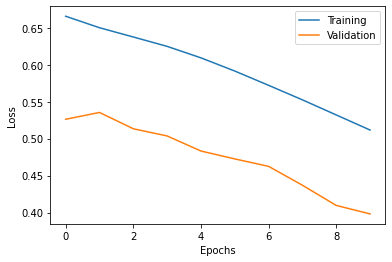

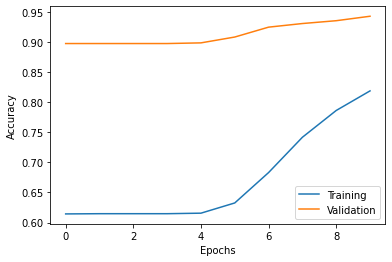

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

**Step 4.** Evaluate the accuracy on test data.

In [22]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.39823925495147705
Test Accuracy: 0.9424999952316284


Let us visualize our model Predictions!

2/2 [==============================] - 0s 2ms/step


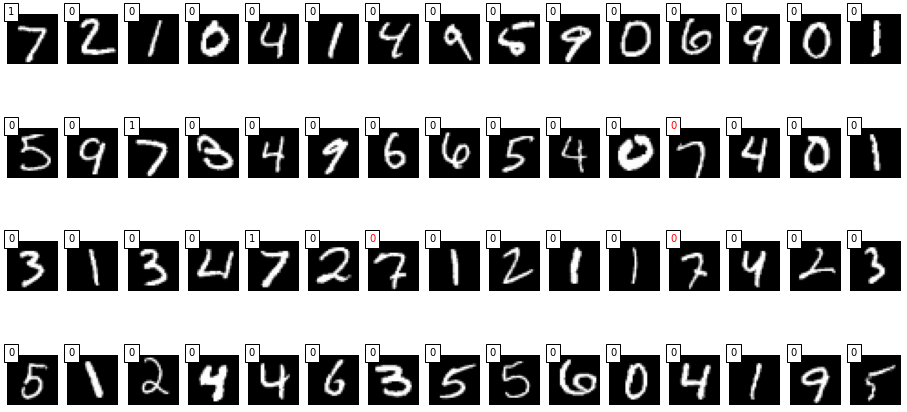

In [23]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if Y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

show_results(model)

#### Question 2.3 (5 points): Can you discuss the performance of the CNN model? What kind of errors is it making?

Our model is currently not classifying any of our values. We can see from our plots of our accuracy regarding our training and our validation are not improving. Our model is unfortunately not able to predict which values are 7 and which values are 1.

#### Question 2.4 (5 points): Go back to step 0, change number of epochs to 10 and run it again. How did it impact the accuracy?

Some, but not all values of 7 have been properly predicted. Our accuracy of training has begun to increase and our loss is decreasing at a more notable rate. As we see an increase in our epoch number, we see a decrease in loss and an increase in accuracy. 

### Train a more complicated CNN (CNN, model 2)

Now, we will define a more complicated CNN architecture. We will train it for only 5 epochs to save time.

In [24]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                86544     
                                                                 
 activation_3 (Activation)   (None, 16)                0         
                                                      

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

nb_epoch = 5
model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 2s 8ms/step - loss: 0.1080 - accuracy: 0.9615 - val_loss: 0.0573 - val_accuracy: 0.9828
Epoch 2/5
255/255 [==============================] - 2s 8ms/step - loss: 0.0643 - accuracy: 0.9791 - val_loss: 0.0416 - val_accuracy: 0.9876
Epoch 3/5
255/255 [==============================] - 2s 8ms/step - loss: 0.0529 - accuracy: 0.9838 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 4/5
255/255 [==============================] - 2s 8ms/step - loss: 0.0462 - accuracy: 0.9871 - val_loss: 0.0452 - val_accuracy: 0.9855
Epoch 5/5
255/255 [==============================] - 2s 8ms/step - loss: 0.0409 - accuracy: 0.9884 - val_loss: 0.0369 - val_accuracy: 0.9882


In [27]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.03692922368645668
Test accuracy: 0.9882000088691711


2/2 [==============================] - 0s 3ms/step


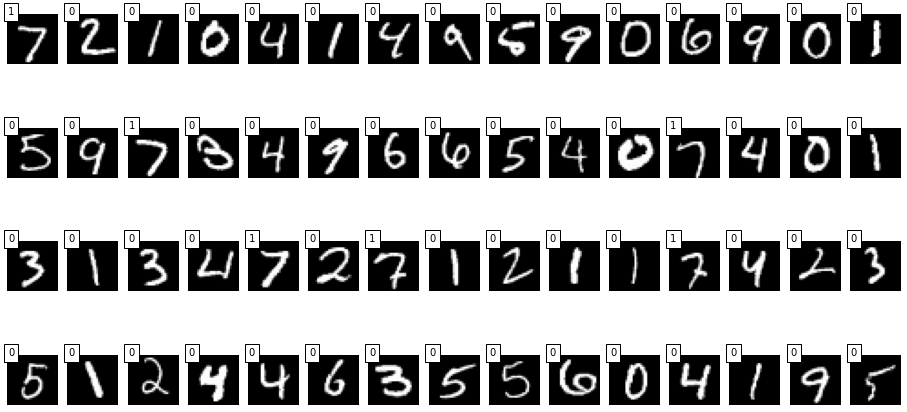

In [28]:
show_results(model)

#### Question 2.5 (5 points): Can you explain the architecture of this CNN (model 2) and how is it different from the first CNN you trained (model 1)? Compare their performance by looking at the visualizstions.

For this convolutional neural network, there is another dense layer and another activation function. This means that there is another layer in the neural network that is allowing it to make better predictions from our training data. 

### Adding more convolutional layers and MaxPooling layers (CNN, model 3)

Now, we will define an even more complicated CNN architecture.

In [29]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)              

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 5s 17ms/step - loss: 0.1223 - accuracy: 0.9524 - val_loss: 0.0438 - val_accuracy: 0.9858
Epoch 2/5
255/255 [==============================] - 5s 18ms/step - loss: 0.0588 - accuracy: 0.9808 - val_loss: 0.0372 - val_accuracy: 0.9872
Epoch 3/5
255/255 [==============================] - 5s 18ms/step - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0268 - val_accuracy: 0.9909
Epoch 4/5
255/255 [==============================] - 5s 18ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0297 - val_accuracy: 0.9910
Epoch 5/5
255/255 [==============================] - 5s 19ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0269 - val_accuracy: 0.9913


In [32]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.026925377547740936
Test accuracy: 0.9912999868392944


2/2 [==============================] - 0s 3ms/step


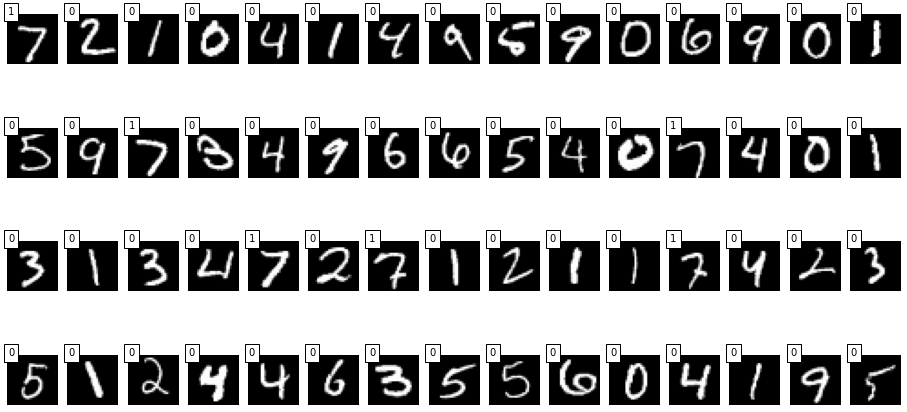

In [33]:
show_results(model)

Another small improvement.

### Wrapping all the code together and play with hyperparameters

The code below wraps up the pieces of codes above into a single function and allows you to play with the hyperparameters by changing the arguments. Try to get the best performance with only 2 training epochs!


In [34]:
nb_epoch = 2

In [35]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 2, conv_activation = "relu", num_dense = 3, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    show_results(model)

An example of running this function

Epoch 1/2
255/255 [==============================] - 12s 46ms/step - loss: 0.3791 - accuracy: 0.8219 - val_loss: 0.1395 - val_accuracy: 0.9514
Epoch 2/2
255/255 [==============================] - 12s 46ms/step - loss: 0.1516 - accuracy: 0.9451 - val_loss: 0.0634 - val_accuracy: 0.9806
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.06337666511535645
Test accuracy: 0.9805999994277954
2/2 [==============================] - 0s 5ms/step


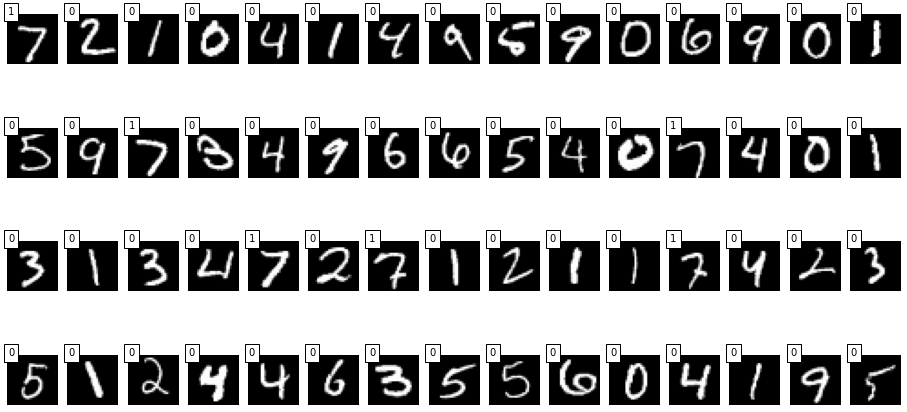

In [36]:
# Here is an example of running build_model() with default hyperparameters
build_model()

Epoch 1/2
255/255 [==============================] - 19s 73ms/step - loss: 0.4557 - accuracy: 0.7560 - val_loss: 0.1588 - val_accuracy: 0.9452
Epoch 2/2
255/255 [==============================] - 18s 71ms/step - loss: 0.1501 - accuracy: 0.9442 - val_loss: 0.0981 - val_accuracy: 0.9680
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.09808558970689774
Test accuracy: 0.9679999947547913
2/2 [==============================] - 0s 7ms/step


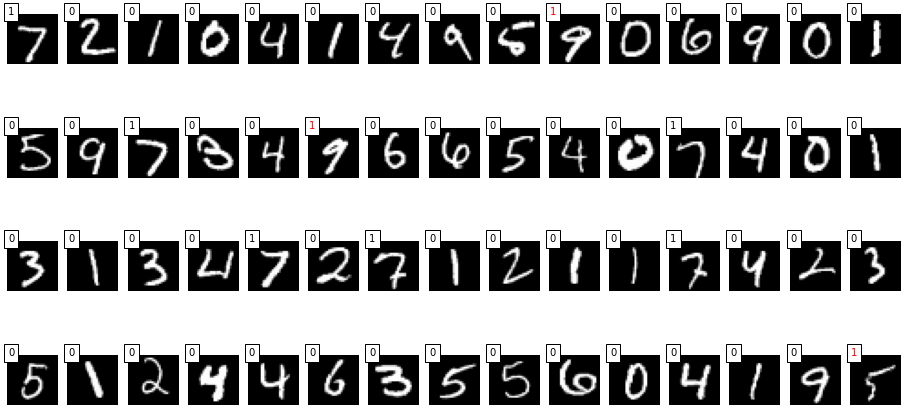

In [37]:
# Here is an example of running build_model() with new hyperparameters
build_model(num_conv = 3, num_dense = 3)

Epoch 1/2
255/255 [==============================] - 12s 46ms/step - loss: 0.3910 - accuracy: 0.8255 - val_loss: 0.0988 - val_accuracy: 0.9716
Epoch 2/2
255/255 [==============================] - 12s 47ms/step - loss: 0.1482 - accuracy: 0.9445 - val_loss: 0.0631 - val_accuracy: 0.9811
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.063139408826828
Test accuracy: 0.9811000227928162
2/2 [==============================] - 0s 5ms/step
26.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


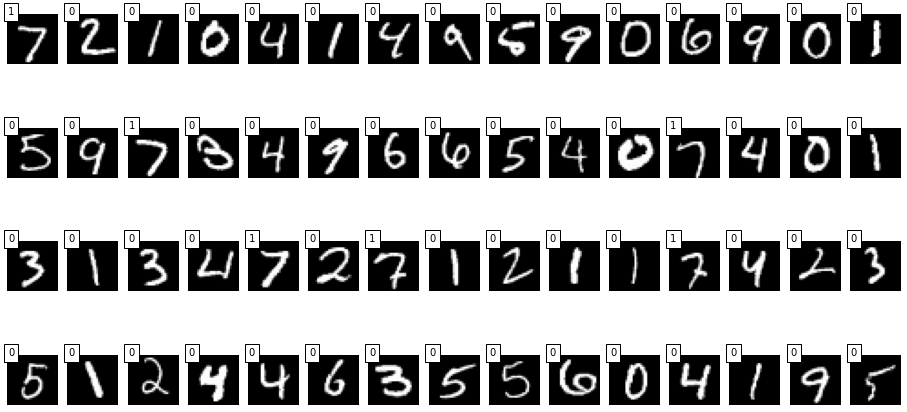

In [38]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

#### Question 2.6 (5 points): Try to change some of the **hyperparameters** without exploding the computational resources on your computer and only using 2 training epochs. 
What is the best accuracy you can get? How many trainable parameters does your model have? How long does the training take?

My computer was unable to compute past 2 convolutional layers and 3 dense layers. My accuracy then became 0.9815 which was greater than the previous accuracy. 

#### Question 2.7 (15 points)

Can you train a model to output 10 classes instead of 2 binary classes? We can use this model to classify images into 10 digits of the mnist data set. Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 digits present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

Epoch 1/5
313/313 [==============================] - 15s 46ms/step - loss: 1.3812 - accuracy: 0.5380 - val_loss: 0.4349 - val_accuracy: 0.8726
Epoch 2/5
313/313 [==============================] - 14s 45ms/step - loss: 0.5841 - accuracy: 0.8180 - val_loss: 0.3414 - val_accuracy: 0.9006
Epoch 3/5
313/313 [==============================] - 14s 45ms/step - loss: 0.4765 - accuracy: 0.8551 - val_loss: 0.3024 - val_accuracy: 0.9120
Epoch 4/5
313/313 [==============================] - 15s 47ms/step - loss: 0.4083 - accuracy: 0.8778 - val_loss: 0.2792 - val_accuracy: 0.9187
Epoch 5/5
313/313 [==============================] - 14s 46ms/step - loss: 0.3681 - accuracy: 0.8911 - val_loss: 0.2484 - val_accuracy: 0.9272
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.24843034148216248
Test accuracy: 0.9272000193595886
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #

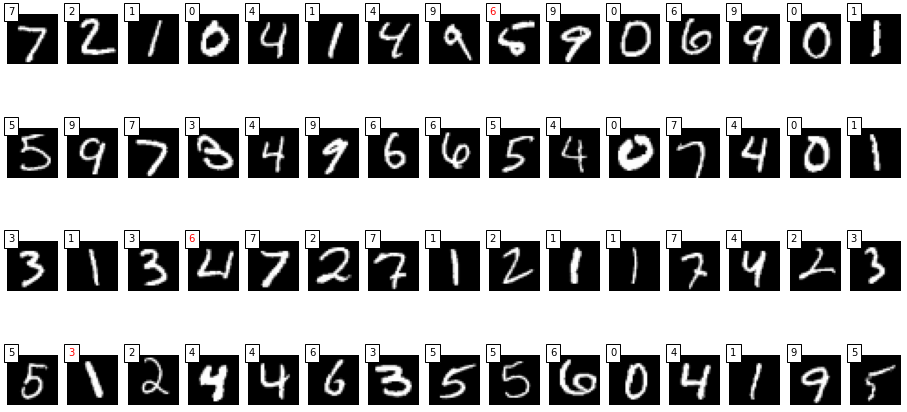

In [39]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  3 15:09:40 2022

@author: gavinkoma
"""
#start with the proper libraries i guess
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

#from step 0
nb_epoch = 5
batch_size = 64
nb_filters = 32
nb_pool = 2
nb_conv = 3

#load and separate your data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test
img_rows, img_cols = 28, 28
shape_ord = (img_rows,img_cols,1)

#normalization, follow the example for this
X_train = X_train[:20000]
Y_train = y_train[:20000]

#i randomized this data
idx = np.random.permutation(len(X_train))
X_train,Y_train = X_train[idx],Y_train[idx]
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(y_test)

nb_classes = 10


# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", dropout = True, max_pooling = True):
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', input_shape=shape_ord))
    model.add(Activation(conv_activation))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation(conv_activation)) 
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dropout(0.50))
    model.add(Dense(128))
    model.add(Activation(dense_activation))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    print(model.summary())
    show_results(model)
    #return accaccuracy

def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)
    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if np.where(Y_test[i] == 1)[0][0] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')


build_model(num_conv = 3, num_dense = 2)

#### Question 2.8 (30 points) 

Train a model on CIFAR10 dataset, which is described in https://www.cs.toronto.edu/~kriz/cifar.html. You can load the dataset from Keras, too. CIFAR10 small image classification contains 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

```python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 categories present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

Epoch 1/10
313/313 [==============================] - 19s 59ms/step - loss: 2.2378 - accuracy: 0.1532 - val_loss: 2.0633 - val_accuracy: 0.2598
Epoch 2/10
313/313 [==============================] - 18s 59ms/step - loss: 2.0383 - accuracy: 0.2485 - val_loss: 1.9601 - val_accuracy: 0.3025
Epoch 3/10
313/313 [==============================] - 18s 58ms/step - loss: 1.9512 - accuracy: 0.2951 - val_loss: 1.9793 - val_accuracy: 0.3082
Epoch 4/10
313/313 [==============================] - 18s 58ms/step - loss: 1.8660 - accuracy: 0.3289 - val_loss: 1.8142 - val_accuracy: 0.3618
Epoch 5/10
313/313 [==============================] - 18s 58ms/step - loss: 1.7763 - accuracy: 0.3629 - val_loss: 1.7332 - val_accuracy: 0.3797
Epoch 6/10
313/313 [==============================] - 18s 58ms/step - loss: 1.6978 - accuracy: 0.3899 - val_loss: 1.6531 - val_accuracy: 0.4107
Epoch 7/10
313/313 [==============================] - 18s 59ms/step - loss: 1.6379 - accuracy: 0.4104 - val_loss: 1.5554 - val_accuracy:

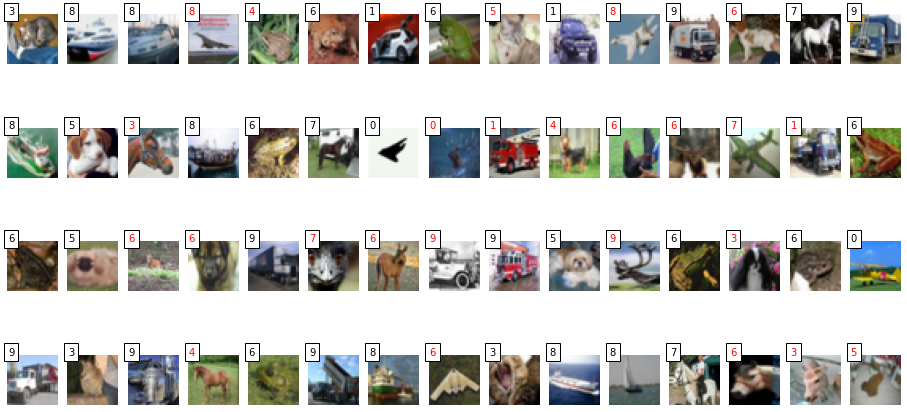

In [40]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  3 18:00:06 2022

@author: gavinkoma
"""
#start with the proper libraries i guess
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt


#load your data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_test_orig = X_test
img_rows = 32
img_cols = 32
shape_ord = (img_rows,img_cols,3)


#from step 0, just going to keep using these for now
nb_epoch = 10
batch_size = 64
nb_filters = 32
nb_pool = 2
nb_conv = 3
nb_classes = 10

#normalization brother
X_train = X_train[:20000]
Y_train = Y_train[:20000]
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)


def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)
    plt.figure(figsize=(16,8))
    
    for i in range(sliced):
        plt.subplot(rows,columns,i+1)
        plt.imshow(X_test_orig[i],cmap='gray',vmin=0,vmax=255)
        color = 'black' if np.where(Y_test[i] ==1)[0][0] == predicted[i] else 'red'
        plt.text(0,0,predicted[i],color = color,
                 bbox=dict(facecolor='white',alpha = 1))
        plt.axis('off')


#lets build the model
def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', input_shape=shape_ord))
    model.add(Activation(conv_activation))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation(conv_activation)) 
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dropout(0.50))
    model.add(Dense(128))
    model.add(Activation(dense_activation))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    
    score, accuracy = model.evaluate(X_test, Y_test, verbose = 0)
    print(num_conv, 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("with max pooling")
    if dropout: print("with dropout")
    
    print('Test score: ' + str(score))
    print('Test accuracy: ' +str(accuracy))
    print(model.summary())
    print(model.summary)
    show_results(model)
    return

        
build_model(num_conv=3, num_dense=2)  
